# Proyecto Data Science
#### Causas de mortalidad a nivel mundial
#### Autora: *Martinez Gabriela*

In [278]:
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

import sidetable as st
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
import sweetviz as sv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from dataprep.clean import clean_headers
import warnings
warnings.filterwarnings('ignore')
from dataprep.eda.missing.compute import compute_missing
from dataprep.eda import *

from utils.utils import make_bar_plot, get_high_season, train_base_model, plot_feature_importance 
import phik
from phik import resources

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from sklearn.ensemble import  HistGradientBoostingRegressor
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit


# Resumen
Hay varios factores de riesgo que están asociados con una mayor mortalidad o riesgo de muerte a nivel mundial. Éstas, entre otros, incluyen:
Consumo de tabaco: como factor que aumenta el riesgo de enfermedades como el cáncer de pulmón, las enfermedades cardíacas y los accidentes cerebrovasculares.
Dieta poco saludable e inactividad física: debido a que incide en el riesgo de enfermedades crónicas como la obesidad, la diabetes y las enfermedades cardiovasculares.
Consumo de alcohol: el consumo excesivo de alcohol está asociado con un mayor riesgo de numerosos problemas de salud, incluidas enfermedades hepáticas, ciertos tipos de cáncer y lesiones.
Falta de acceso a saneamiento y agua segura: en relacion al riesgo de adquirir infecciones gastrointestinales, potencialmente mortales en niños y ancianos.
Conocer su distribucion y predecir su evolucion, permitiria abordar estos factores de riesgo a través de medidas de prevención y control, como la promoción de comportamientos saludables, para reducir la carga mundial de enfermedades y mejorar los resultados generales en salud.

#### Preguntas de interes
¿Cuales son los paises con mayor mortalidad a nivel general?
¿Cuales son los factores de riesgo mas frecuentemente relacionados a mortalidad?
¿Es diferente la distribucion de los mismos en regiones de altos y bajos ingresos?
¿La mortalidad especifica por determinado factores de riesgo es igual a lo largo de los años?
¿Es posible predecir la cantidad de muertes relacionadas a estos factores de riesgo?

# Objetivo
El dataset recolecta informacion acerca de los factores relacionadas a la muerte por pais desde el año 1990 al 2019 (our world in data).
El objetivo del analisis es evaluar cuales fueron los factores mas frecuentemente asociados a muerte a nivel mundial a traves del tiempo, desde el año 1990 al 2019, observar las diferencias entre regiones de altos y bajos ingresos y establecer predicciones a futuro en cuanto a su incidencia.

In [279]:
df = pd.read_csv("death.csv")

## Pre- procesamiento de datos y limpieza

In [280]:
#limpiamos los espacios que existan en las columnas del df
df = clean_headers(df)
df

Column Headers Cleaning Report:
	31 values cleaned (100.0%)


,entity,code,year,outdoor_air_pollution,high_systolic_blood_pressure,diet_high_in_sodium,diet_low_in_whole_grains,alcohol_use,diet_low_in_fruits,unsafe_water_source,...,high_body_mass_index,unsafe_sanitation,no_access_to_handwashing_facility,drug_use_sex_both_age_all_ages_number,low_bone_mineral_density,vitamin_a_deficiency,child_stunting,discontinued_breastfeeding,non_exclusive_breastfeeding,iron_deficiency
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261


In [281]:
df.groupby("code").count()#agrupamos por paises, aprox 205 paises

,entity,year,outdoor_air_pollution,high_systolic_blood_pressure,diet_high_in_sodium,diet_low_in_whole_grains,alcohol_use,diet_low_in_fruits,unsafe_water_source,secondhand_smoke,...,high_body_mass_index,unsafe_sanitation,no_access_to_handwashing_facility,drug_use_sex_both_age_all_ages_number,low_bone_mineral_density,vitamin_a_deficiency,child_stunting,discontinued_breastfeeding,non_exclusive_breastfeeding,iron_deficiency
code,,,,,,,,,,,,,,,,,,,,,
AFG,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
AGO,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
ALB,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
AND,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
ARE,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
YEM,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
ZAF,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


Veamos si tengo missing values

In [282]:
compute_missing(df)#no tengo celdas vacias en relacion a los factores de riesgo

{'data_total_missing': {'entity': 0.0,
  'code': 0.10087719298245613,
  'year': 0.0,
  'outdoor_air_pollution': 0.0,
  'high_systolic_blood_pressure': 0.0,
  'diet_high_in_sodium': 0.0,
  'diet_low_in_whole_grains': 0.0,
  'alcohol_use': 0.0,
  'diet_low_in_fruits': 0.0,
  'unsafe_water_source': 0.0,
  'secondhand_smoke': 0.0,
  'low_birth_weight': 0.0,
  'child_wasting': 0.0,
  'unsafe_sex': 0.0,
  'diet_low_in_nuts_and_seeds': 0.0,
  'household_air_pollution_from_solid_fuels': 0.0,
  'diet_low_in_vegetables': 0.0,
  'low_physical_activity': 0.0,
  'smoking': 0.0,
  'high_fasting_plasma_glucose': 0.0,
  'air_pollution': 0.0,
  'high_body_mass_index': 0.0,
  'unsafe_sanitation': 0.0,
  'no_access_to_handwashing_facility': 0.0,
  'drug_use_sex_both_age_all_ages_number': 0.0,
  'low_bone_mineral_density': 0.0,
  'vitamin_a_deficiency': 0.0,
  'child_stunting': 0.0,
  'discontinued_breastfeeding': 0.0,
  'non_exclusive_breastfeeding': 0.0,
  'iron_deficiency': 0.0},
 'data_spectrum':     

Nos quedamos con las columnas que no interesan por el momento y organizamos los datos en formato long para una primera aproximacion visual en mapas

In [283]:
data_columns = df.columns.drop(['entity', 'code', 'year'])
long=pd.melt(df, id_vars=['entity', 'year'], value_vars=data_columns, var_name='factores_riesgo', value_name='conteo')
long

,entity,year,factores_riesgo,conteo
0,Afghanistan,1990,outdoor_air_pollution,3169
1,Afghanistan,1991,outdoor_air_pollution,3222
2,Afghanistan,1992,outdoor_air_pollution,3395
3,Afghanistan,1993,outdoor_air_pollution,3623
4,Afghanistan,1994,outdoor_air_pollution,3788
...,...,...,...,...
191515,Zimbabwe,2015,iron_deficiency,282
191516,Zimbabwe,2016,iron_deficiency,275
191517,Zimbabwe,2017,iron_deficiency,267
191518,Zimbabwe,2018,iron_deficiency,261


In [284]:
data_columns_long_df = df.columns.drop(['entity', 'year'])
df_long = pd.melt(df, id_vars = ['entity', 'code', 'year'], value_vars = data_columns_long_df, var_name='factores_riesgo', value_name = 'conteo')
df_long_total_deaths = df_long.groupby(['entity', 'code'])['conteo'].sum().reset_index()
df_long_total_deaths = df_long_total_deaths.drop(201).reset_index()

In [285]:
import plotly.express as px
import plotly.graph_objs as go
pd.options.plotting.backend = "plotly"

In [286]:
fig = px.choropleth(df_long_total_deaths, locations="code",
                    color="conteo",
                    hover_name="entity",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Cantidad de muertos 1990-2019",
        x=0.5
    ),
    font=dict(size=12),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

Rapidamente se observa que los paises con mayor mortalidad son China, India, Rusia y EE.UU, ahora veamos en una linea de tiempo la evolucion de los 7 paises con mayor mortalidad a lo largo de 30 años (1990- 2019), y en forma general en un grafico de barras interactivo. Para esto agrupamos por año y por pais y desestimamos las categorias que no nos interesan analizar en este momento

In [287]:
df_long_total_deaths_by_years = df_long.groupby(['entity', 'code', 'year'])['conteo'].sum().reset_index()#agrupamos segun pais y año
df_long_total_deaths_by_years

,entity,code,year,conteo
0,Afghanistan,AFG,1990,212147
1,Afghanistan,AFG,1991,219979
2,Afghanistan,AFG,1992,237528
3,Afghanistan,AFG,1993,260131
4,Afghanistan,AFG,1994,272417
...,...,...,...,...
6145,Zimbabwe,ZWE,2015,129551
6146,Zimbabwe,ZWE,2016,127915
6147,Zimbabwe,ZWE,2017,125639
6148,Zimbabwe,ZWE,2018,123001


In [288]:
df_long_total_deaths_by_years = df_long.groupby(['entity', 'year'])['conteo'].sum().reset_index()
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "World"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "G20"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "World Bank Lower Middle Income"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "World Bank Upper Middle Income"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "East Asia & Pacific (WB)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "Western Pacific Region (WHO)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "South-East Asia Region (WHO)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "South Asia (WB)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "European Region (WHO)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "Europe & Central Asia (WB)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "OECD Countries"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "Sub-Saharan Africa (WB)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "World Bank High Income"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "African Region (WHO)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "Region of the Americas (WHO)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "World Bank Low Income"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "Eastern Mediterranean Region (WHO)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "Latin America & Caribbean (WB)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "Middle East & North Africa (WB)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years[df_long_total_deaths_by_years.entity != "North America (WB)"]
df_long_total_deaths_by_years = df_long_total_deaths_by_years.sort_values(by = ["conteo"], ascending = False).head(210)

In [289]:
df_long_total_deaths_by_years_wide = pd.pivot(df_long_total_deaths_by_years, index=["year"], columns="entity", values="conteo").reset_index()
df_long_total_deaths_by_years_wide.head(7)

entity,year,China,India,Indonesia,Nigeria,Pakistan,Russia,United States
0,1990,10195892,9552915,1434876,1732548,1399227,1905164,2190281
1,1991,10289498,9650106,1418513,1798445,1421281,1938300,2184429
2,1992,10357682,9727583,1408473,1778060,1445436,2090791,2178094
3,1993,10394716,9611671,1403617,1795438,1472322,2495036,2226933
4,1994,10356371,9501175,1398719,1820754,1501207,2745138,2243229
5,1995,10333784,9427651,1394958,1847320,1530859,2618469,2267578
6,1996,10346084,9498810,1393187,1892243,1539397,2465563,2254925


In [290]:
px.line(df_long_total_deaths_by_years_wide, x='year', y=['China', 'India', 'Indonesia', 'Nigeria', 'Pakistan','Russia','United States'],labels={'x':'año','y':'Price'},
        title='Evolucion en el tiempo de los 7 paises con mayor mortalidad')

In [291]:
px.bar(df_long_total_deaths_by_years, y='conteo', x='entity', color='entity', title="Los 7 paises con mayor mortalidad general")

Como parte del procesamiento de los datos, se decidio tomar un subset con las variables de interes y se colapsaran aquellas causas relacionadas a muerte que estan referidas a un mismo grupo de factores de riesgo como por ejemplo: unsafe water source, un safe sanitation, no access to handwashing facility se colapsaran en "escaso acceso a agua segura" y diet low in vegetables, diet low in fruits, diet low in whole grains, diet low in nuts and seeds en "dieta baja en fibras".

In [292]:
#colapso a escaso acceso a agua segura
df_tmp= pd.DataFrame()
a = long[["entity", "year"]].value_counts().reset_index()

for r in a[["entity", "year"]].itertuples(index=True, name='Pandas'):
    valor = long.loc[(long.year == r.year) & (long.entity == r.entity) & (long['factores_riesgo'].isin(["unsafe_water_source", "unsafe_sanitation", "no_access_to_handwashing_facility"])), 'conteo'].sum()

    new_row = {"year": r.year, "entity": r.entity, "factores_riesgo": "Escaso acceso a agua segura", "conteo": valor}

    df2 = pd.DataFrame(new_row, index=[0])

    df_tmp = pd.concat([df_tmp, df2], ignore_index = True)

long = pd.concat([long, df_tmp], ignore_index = True).reset_index()

In [293]:
#colpaso a dieta baja en fibras
df_tmp= pd.DataFrame()
a = long[["entity", "year"]].value_counts().reset_index()

for r in a[["entity", "year"]].itertuples(index=True, name='Pandas'):
    valor = long.loc[(long.year == r.year) & (long.entity == r.entity) & (long['factores_riesgo'].isin(["diet_low_in_whole_grains","diet_low_in_fruits", "diet_low_in_nuts_and_seeds", "diet_low_in_vegetables"])), 'conteo'].sum()

    new_row = {"year": r.year, "entity": r.entity, "factores_riesgo": "Dieta baja en fibras", "conteo": valor}

    df3 = pd.DataFrame(new_row, index=[0])

    df_tmp = pd.concat([df_tmp, df3], ignore_index = True)

long = pd.concat([long, df_tmp], ignore_index = True).reset_index()


In [294]:
indexDrop = long[ (long["factores_riesgo"]=="unsafe_water_source") | (long["factores_riesgo"]=="unsafe_sanitation")  | (long["factores_riesgo"]=="no_access_to_handwashing_facility")|(long["factores_riesgo"]=="diet_low_in_whole_grains") | (long["factores_riesgo"]=="diet_low_in_fruits")  | (long["factores_riesgo"]=="diet_low_in_nuts_and_seeds") | (long["factores_riesgo"]=="diet_low_in_vegetables")| (long["factores_riesgo"]=="outdoor_air_pollution") | (long["factores_riesgo"]=="secondhand_smoke")  | (long["factores_riesgo"]=="child_wasting") | (long["factores_riesgo"]=="unsafe_sex")| (long["factores_riesgo"]=="household_air_pollution_from_solid_fuels") | (long["factores_riesgo"]=="air_pollution") | (long["factores_riesgo"]=="drug_use_sex_both_age_all_ages_number") | (long["factores_riesgo"]=="low_bone_mineral_density") | (long["factores_riesgo"]=="child_stunting") | (long["factores_riesgo"]=="discontinued_breastfeeding") | (long["factores_riesgo"]=="non_exclusive_breastfeeding")].index

long.drop(indexDrop , inplace=True)
long

,level_0,index,entity,year,factores_riesgo,conteo
6840,6840,6840.0,Afghanistan,1990,high_systolic_blood_pressure,25633
6841,6841,6841.0,Afghanistan,1991,high_systolic_blood_pressure,25872
6842,6842,6842.0,Afghanistan,1992,high_systolic_blood_pressure,26309
6843,6843,6843.0,Afghanistan,1993,high_systolic_blood_pressure,26961
6844,6844,6844.0,Afghanistan,1994,high_systolic_blood_pressure,27658
...,...,...,...,...,...,...
205195,205195,NaN,Ghana,2017,Dieta baja en fibras,6250
205196,205196,NaN,Ghana,2016,Dieta baja en fibras,6059
205197,205197,NaN,Ghana,2015,Dieta baja en fibras,5872
205198,205198,NaN,Ghana,2014,Dieta baja en fibras,5659


Ahora graficamos para tener una idea de cuales son los factores de riesgo que vamos a estudiar, que seran: HTA, dieta alta en sodio, uso de alcohol, bajo peso al nacer, baja actividad fisica, tabaquismo, glucosa alta en plasma, IMC elevado, deficit de vitamina A, deficit de hierro, escaso acceso a agua segura y dieta baja en fibras y conocer la evolucion de los mismos a lo largo de los años

Text(0.5, 1.0, 'Factores de riesgo relacionados a mortalidad general')

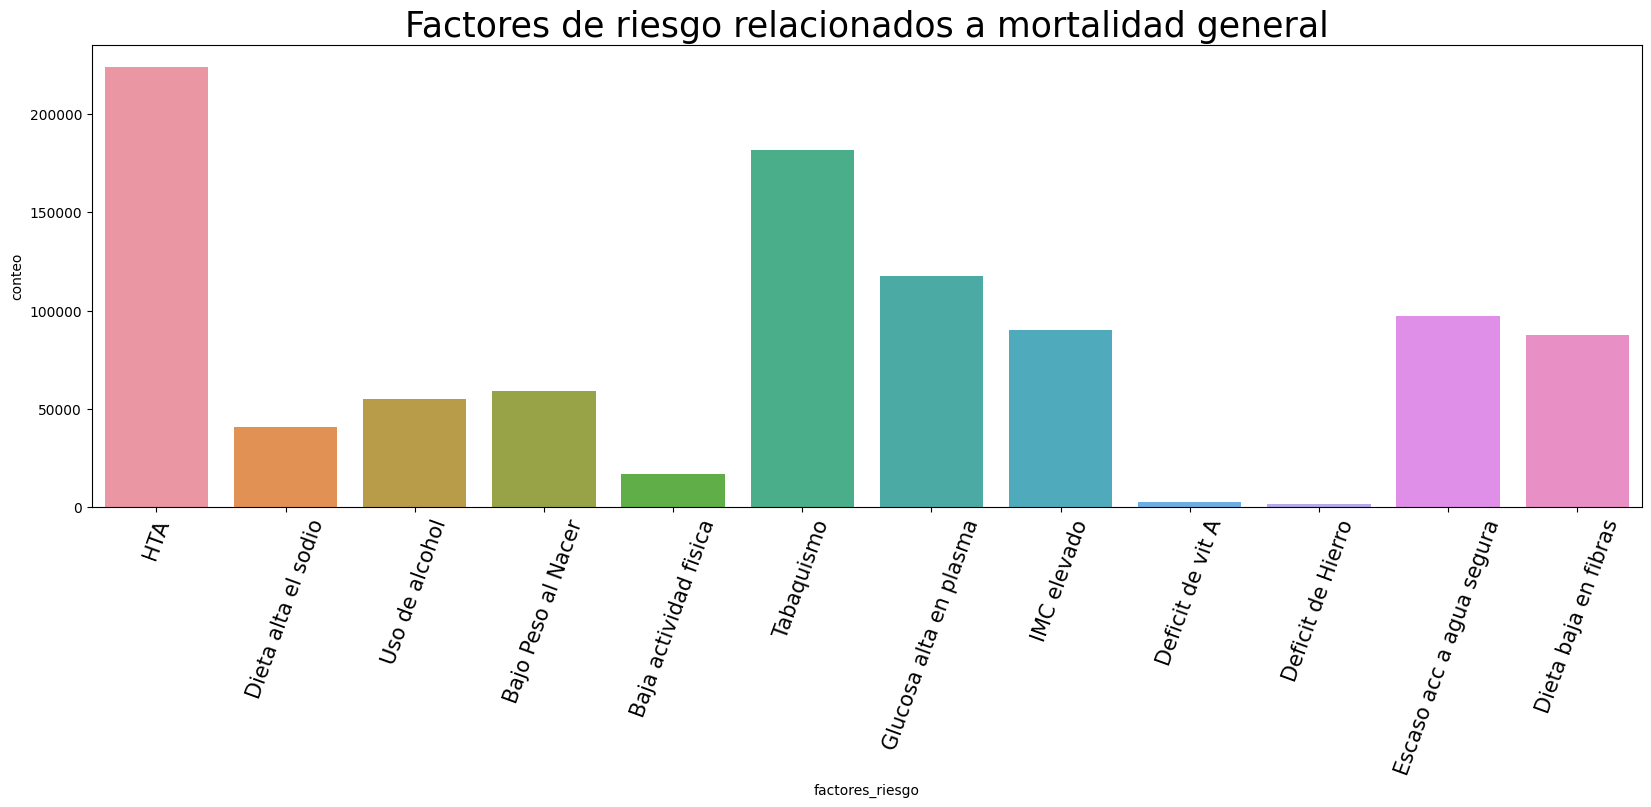

In [295]:
plt.figure(figsize=(20,6))
d=sns.barplot(data=long, x="factores_riesgo", y="conteo", ci=None)
d.set_xticklabels(
    labels=["HTA", "Dieta alta el sodio", "Uso de alcohol", "Bajo Peso al Nacer","Baja actividad fisica","Tabaquismo","Glucosa alta en plasma","IMC elevado","Deficit de vit A","Deficit de Hierro","Escaso acc a agua segura","Dieta baja en fibras"], rotation=70,fontdict={'size': 15})
d.set_title('Factores de riesgo relacionados a mortalidad general',fontdict={'size': 25})

In [296]:
del px
del go
pd.options.plotting.backend = "matplotlib"

In [297]:
long['year'] = pd.to_datetime(long['year'], format='%Y')
long_all= pd.pivot_table(
            data    = long,
            values  = 'conteo',
            index   = 'year',
            columns = 'factores_riesgo'
        )
long_all.columns.name = None
long_all.columns = [f"{col}" for col in long_all.columns]
long_all= long_all.asfreq('1Y', method='pad')
long_all= long_all.sort_index()

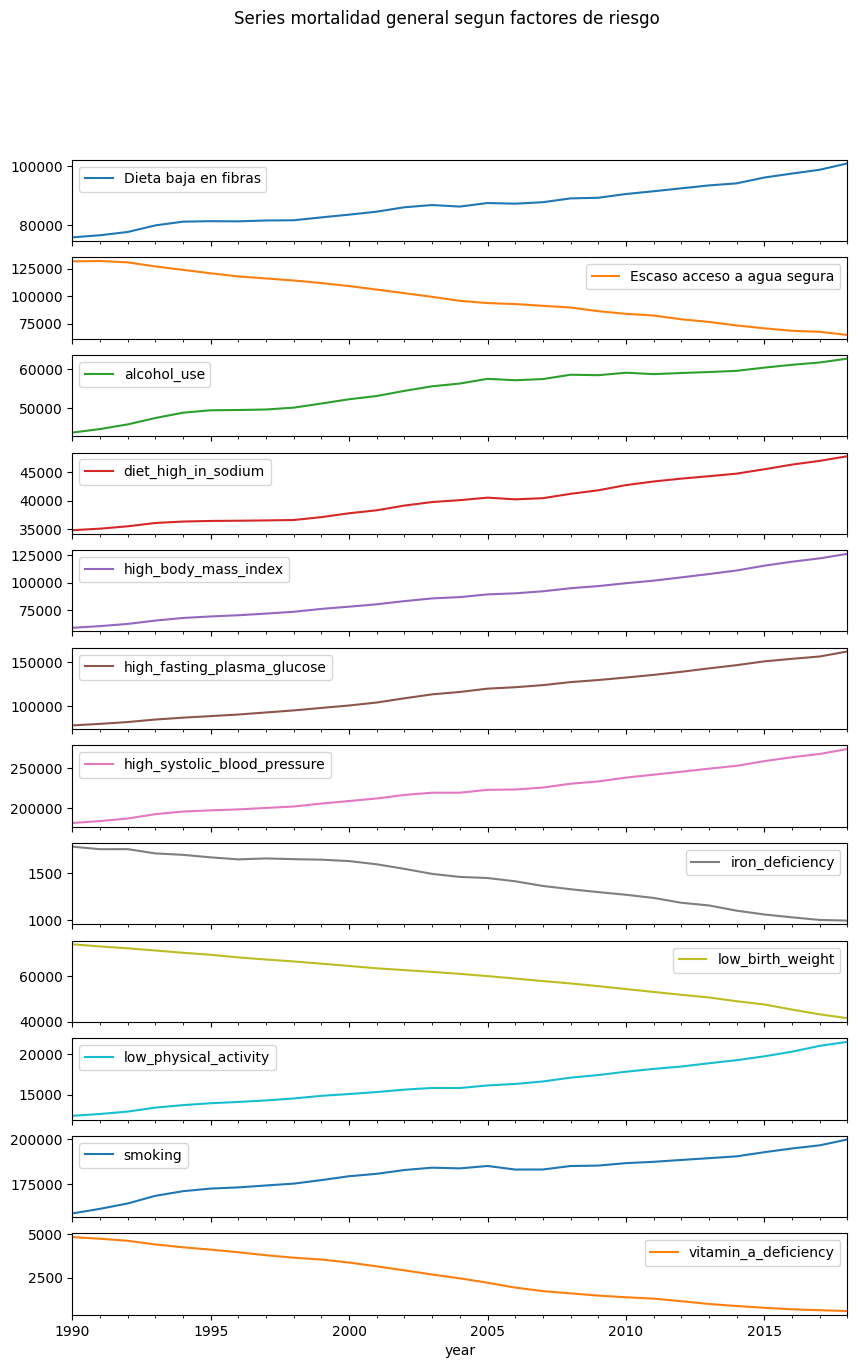

In [298]:
fig, ax = plt.subplots(figsize=(10, 15))
long_all.iloc[:, :12].plot(
      legend   = True,
      subplots = True, 
      sharex   = True,
      title    = 'Series mortalidad general segun factores de riesgo',
     ax       = ax, 
 );

Se puede observar que los factores relacionados al riesgo cardiovascular, como la dbt y el IMC elevado, tienen un aumento sostenido, sin embargo, el caso del tabaquismo, el bajo consumo de fibras y la HTA, tuvieron una estabilidad hacia el año 2010, para aumentar nuevamente a partir de alli. Por otro lado el deficit de vitamina A, el deficit de hierro, el bajo peso al nacer y el escaso acceso al agua segura vienen en descenso sostenido.

Para nuestro analisis tomamos los datos de paises con altos y bajos ingresos, armamos la tabla de frecuencias segun factores de riesgo en orden descendente y luego graficamos en forma comparativa

In [299]:
df_wb = long[(long["entity"] == "World Bank Low Income") | (long["entity"] == "World Bank High Income")]
del(df_wb['index'])
df_wb

,level_0,entity,year,factores_riesgo,conteo
13470,13470,World Bank High Income,1990-01-01,high_systolic_blood_pressure,2120532
13471,13471,World Bank High Income,1991-01-01,high_systolic_blood_pressure,2109771
13472,13472,World Bank High Income,1992-01-01,high_systolic_blood_pressure,2088583
13473,13473,World Bank High Income,1993-01-01,high_systolic_blood_pressure,2090782
13474,13474,World Bank High Income,1994-01-01,high_systolic_blood_pressure,2071860
...,...,...,...,...,...
200599,200599,World Bank Low Income,1990-01-01,Dieta baja en fibras,104318
200600,200600,World Bank High Income,2019-01-01,Dieta baja en fibras,681562
200601,200601,World Bank High Income,2018-01-01,Dieta baja en fibras,667554
200602,200602,World Bank High Income,2017-01-01,Dieta baja en fibras,649710


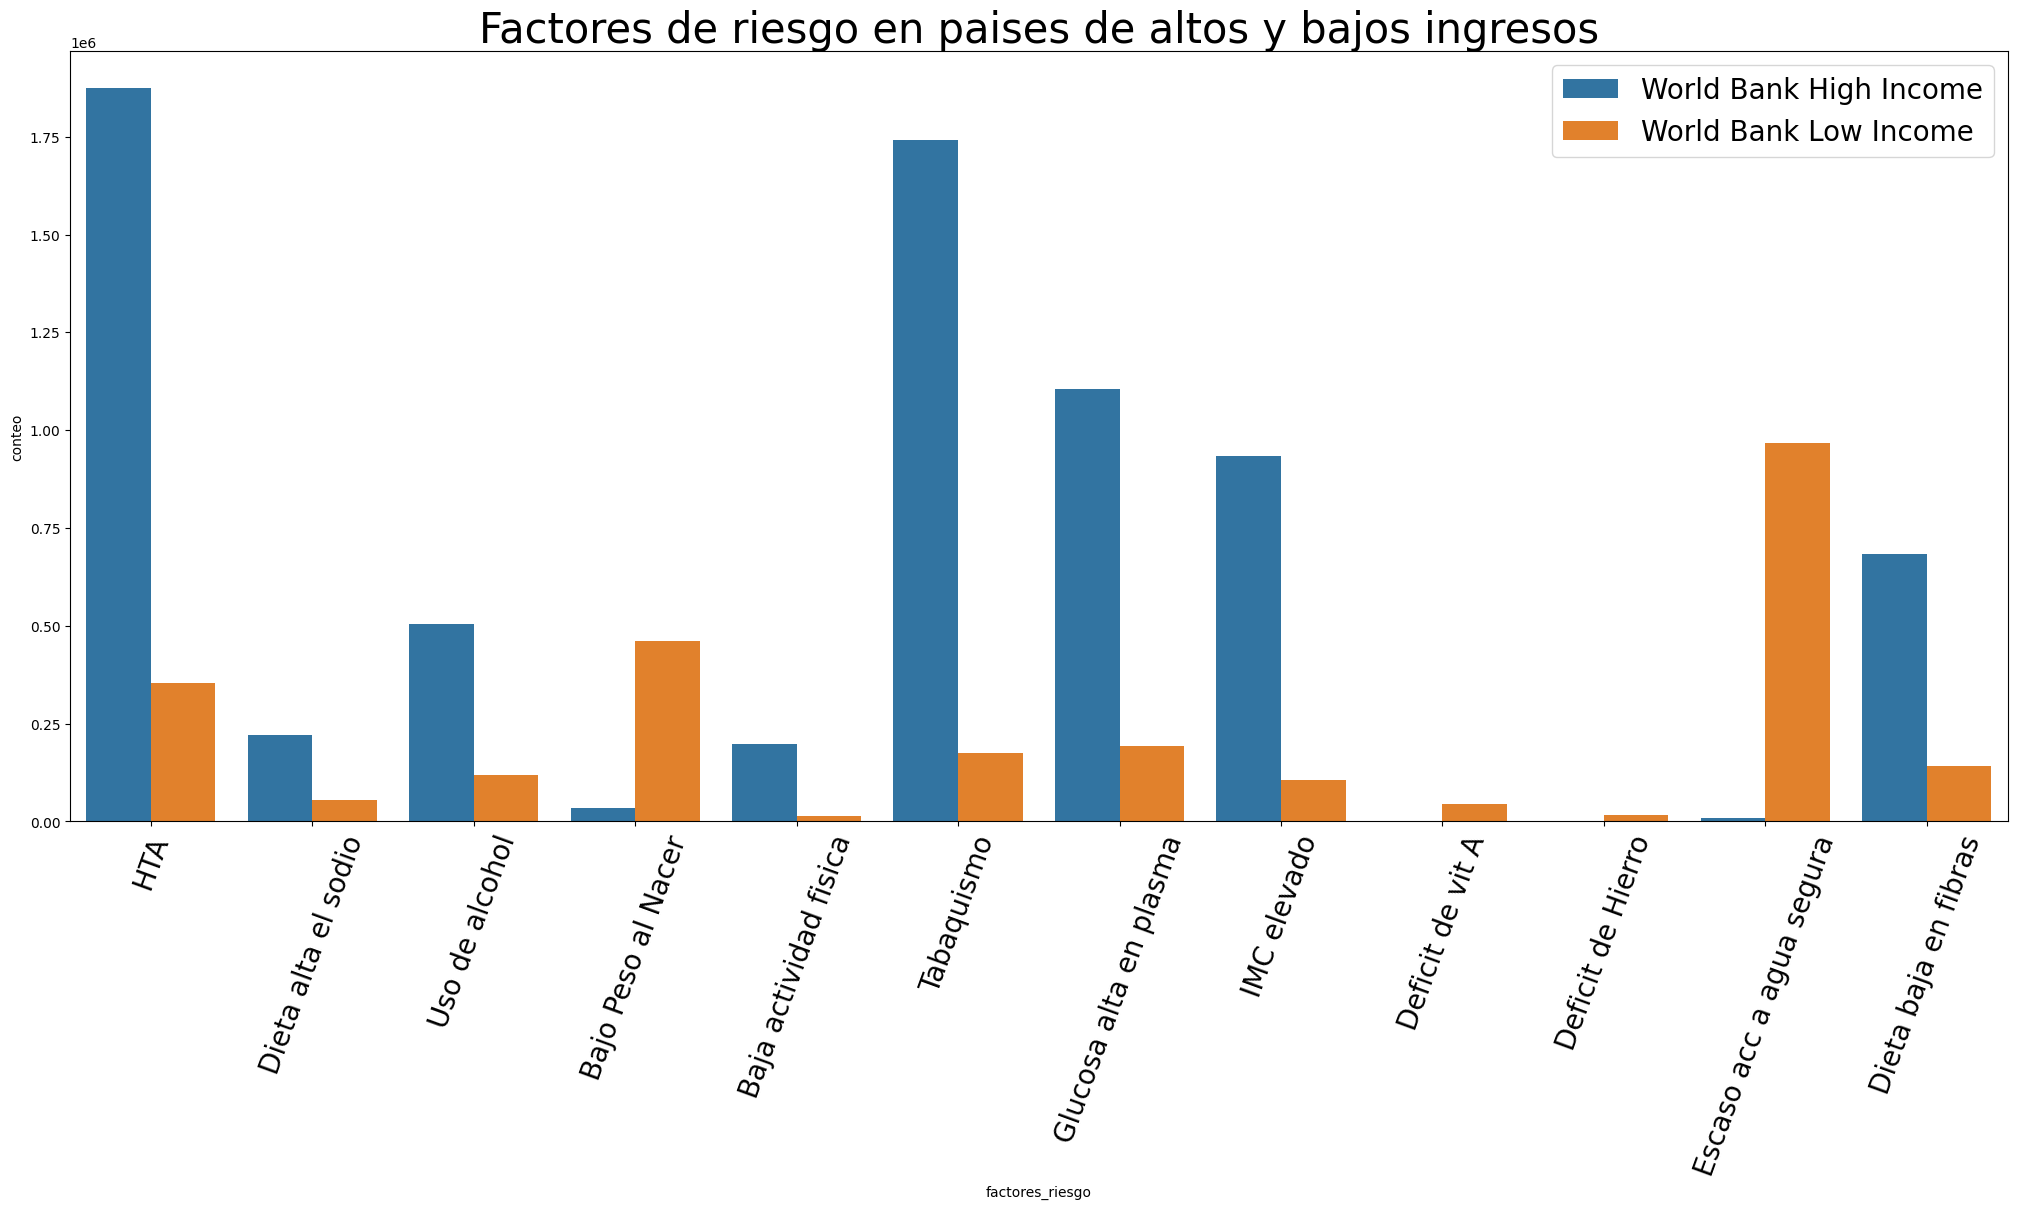

In [300]:
plt.figure(figsize=(25,10))
g = sns.barplot(data=df_wb, x="factores_riesgo", y="conteo", ci=None, hue="entity")
g.set_xticklabels(
    labels=["HTA", "Dieta alta el sodio", "Uso de alcohol", "Bajo Peso al Nacer","Baja actividad fisica","Tabaquismo","Glucosa alta en plasma","IMC elevado","Deficit de vit A","Deficit de Hierro","Escaso acc a agua segura","Dieta baja en fibras"], rotation=70,fontdict={'size': 20})
g.set_title('Factores de riesgo en paises de altos y bajos ingresos',fontdict={'size': 30})
plt.legend(fontsize='20')

In [301]:
tabla_frecuencia = df_wb.stb.freq(['entity', 'factores_riesgo'], value='conteo')
tabla_frecuencia.round(3)

,entity,factores_riesgo,conteo,percent,cumulative_conteo,cumulative_percent
0,World Bank High Income,high_systolic_blood_pressure,56225760,18.835,56225760,18.835
1,World Bank High Income,smoking,52241161,17.500,108466921,36.335
2,World Bank High Income,high_fasting_plasma_glucose,33167202,11.111,141634123,47.446
3,World Bank Low Income,Escaso acceso a agua segura,28990728,9.712,170624851,57.158
4,World Bank High Income,high_body_mass_index,28040187,9.393,198665038,66.551
5,World Bank High Income,Dieta baja en fibras,20543022,6.882,219208060,73.432
6,World Bank High Income,alcohol_use,15139602,5.072,234347662,78.504
7,World Bank Low Income,low_birth_weight,13857175,4.642,248204837,83.146
8,World Bank Low Income,high_systolic_blood_pressure,10639863,3.564,258844700,86.710
9,World Bank High Income,diet_high_in_sodium,6611483,2.215,265456183,88.925


Vemos que relaciones podemos observar entre paises de ambos tipos de ingresos

In [302]:
pd.crosstab(index=df_wb["factores_riesgo"], columns=df_wb["entity"], values=df_wb["conteo"], aggfunc="sum").apply(lambda r: r/r.sum(),
                                axis=1).round(4)

entity,World Bank High Income,World Bank Low Income
factores_riesgo,,
Dieta baja en fibras,0.8296,0.1704
Escaso acceso a agua segura,0.0095,0.9905
alcohol_use,0.8089,0.1911
diet_high_in_sodium,0.8003,0.1997
high_body_mass_index,0.8984,0.1016
high_fasting_plasma_glucose,0.8520,0.1480
high_systolic_blood_pressure,0.8409,0.1591
iron_deficiency,0.0138,0.9862
low_birth_weight,0.0670,0.9330


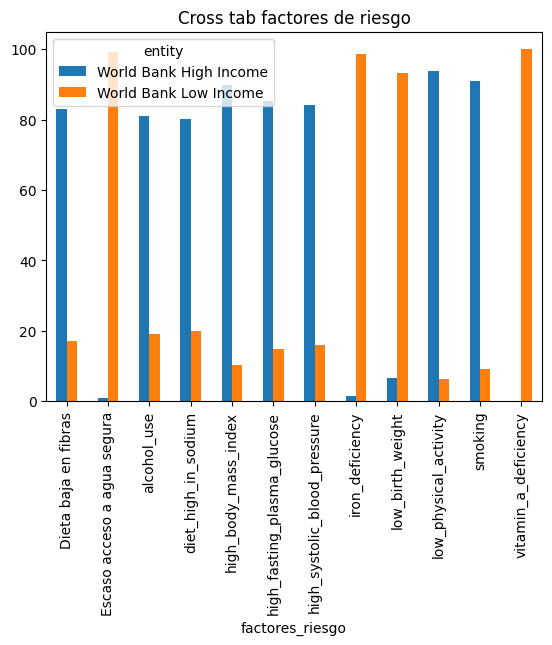

In [303]:
plot=pd.crosstab(index=df_wb["factores_riesgo"], columns=df_wb["entity"], values=df_wb["conteo"], aggfunc="sum").apply(lambda r: r/r.sum()*100,
                                axis=1).plot(kind="bar",title="Cross tab factores de riesgo")


Se puede observar, que la HTA es uno de los FR mas frecuentemente asociado a muerte en paises de altos ingresos, asi como tambien, la baja actividad fisica, IMC elevado, fumar y la glucemia elevada, mientas que en paises de bajos ingresos fueron el escaso acceso a agua segura, deficit de hierro y vitamina A y el bajo peso al nacer.

Veamos que se obtiene al aplicar informacion mutua, y si se puede reducir las variables que se introducen finalmente en el modelo para predecir la mortalidad relacionada. Volvemos al formato wide y luego graficamos

In [304]:
df_wb_wide = pd.pivot(df_wb, index=["year", "entity"], columns="factores_riesgo", values="conteo").reset_index()
df_wb_wide.head()

factores_riesgo,year,entity,Dieta baja en fibras,Escaso acceso a agua segura,alcohol_use,diet_high_in_sodium,high_body_mass_index,high_fasting_plasma_glucose,high_systolic_blood_pressure,iron_deficiency,low_birth_weight,low_physical_activity,smoking,vitamin_a_deficiency
0,1990-01-01,World Bank High Income,775957,11061,484390,250774,807304,965735,2120532,284,55852,194558,1854185,133
1,1990-01-01,World Bank Low Income,104318,1101437,102584,45622,65462,125809,252879,15420,437284,8832,140212,71698
2,1991-01-01,World Bank High Income,771090,10402,484671,248909,817731,962836,2109771,269,52849,196541,1853520,90
3,1991-01-01,World Bank Low Income,106563,1116087,104322,46322,66736,129352,258678,15429,441255,9011,143010,71443
4,1992-01-01,World Bank High Income,761503,9861,483273,246259,823808,956843,2088583,255,49753,198151,1844551,60


In [305]:
mutual_info = mutual_info_classif(df_wb_wide.drop(['entity','year'], axis=1), df_wb_wide['entity'])

<AxesSubplot: title={'center': 'Mutual Info'}, xlabel='factores_riesgo'>

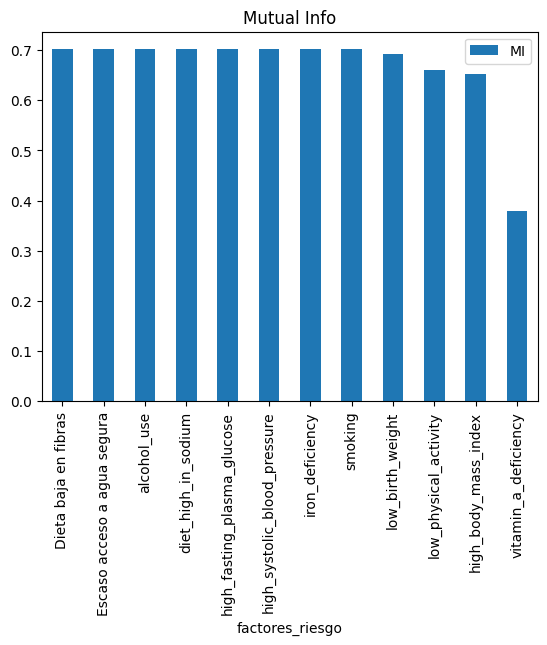

In [306]:
mi=pd.DataFrame(mutual_info, index=df_wb_wide.drop(['entity','year'], axis=1).columns, columns=['MI']).sort_values('MI', ascending=False)
mi.plot(kind="bar", title="Mutual Info")

Los factores de riesgo que estan mas relacionados a la mortalidad general, parecen ser segun mutual info: glucosa alta en plasma, deficiencia de hierro, fumar, uso de alcohol, dieta alta en sodio, dieta baja en fibras, escaso acceso al agua segura, HTA, baja actividad fisica, IMC elevado y en menor medida, bajo peso al nacer y la deficiencia de vitamina A. Se deciden utilizar los 12 factores de riesgo
Vamos ahora con el modelado de series temporales.

## Modelado de series temporales
Seleccionamos a los fines del proyecto solo las regiones de altos ingresos, primero las graficamos y luego planteamos un modelo ARIMA y posteriormente evaluamos el rendimiento de modelos separando los datos en train y test por CV

In [307]:
data = pd.read_csv('./df_wb.csv')
columns = data.columns.drop(["Unnamed: 0"])
data = data[columns]

data

,level_0,entity,year,factores_riesgo,conteo
0,13470,World Bank High Income,1990,high_systolic_blood_pressure,2120532
1,13471,World Bank High Income,1991,high_systolic_blood_pressure,2109771
2,13472,World Bank High Income,1992,high_systolic_blood_pressure,2088583
3,13473,World Bank High Income,1993,high_systolic_blood_pressure,2090782
4,13474,World Bank High Income,1994,high_systolic_blood_pressure,2071860
...,...,...,...,...,...
715,200599,World Bank Low Income,1990,Dieta baja en fibras,104318
716,200600,World Bank High Income,2019,Dieta baja en fibras,681562
717,200601,World Bank High Income,2018,Dieta baja en fibras,667554
718,200602,World Bank High Income,2017,Dieta baja en fibras,649710


In [308]:
selected_entity = "World Bank High Income"
selected_factor = data.factores_riesgo.unique()

data = data[(data['entity'] == selected_entity) & (data['factores_riesgo'].isin(selected_factor))].copy()
data['year'] = pd.to_datetime(data['year'], format='%Y')
data = pd.pivot_table(
           data    = data,
           values  = 'conteo',
           index   = 'year',
           columns = 'factores_riesgo'
       )
data.columns.name = None
data.columns = [f"{col}" for col in data.columns]
data = data.asfreq('1Y', method='pad')
data = data.sort_index()

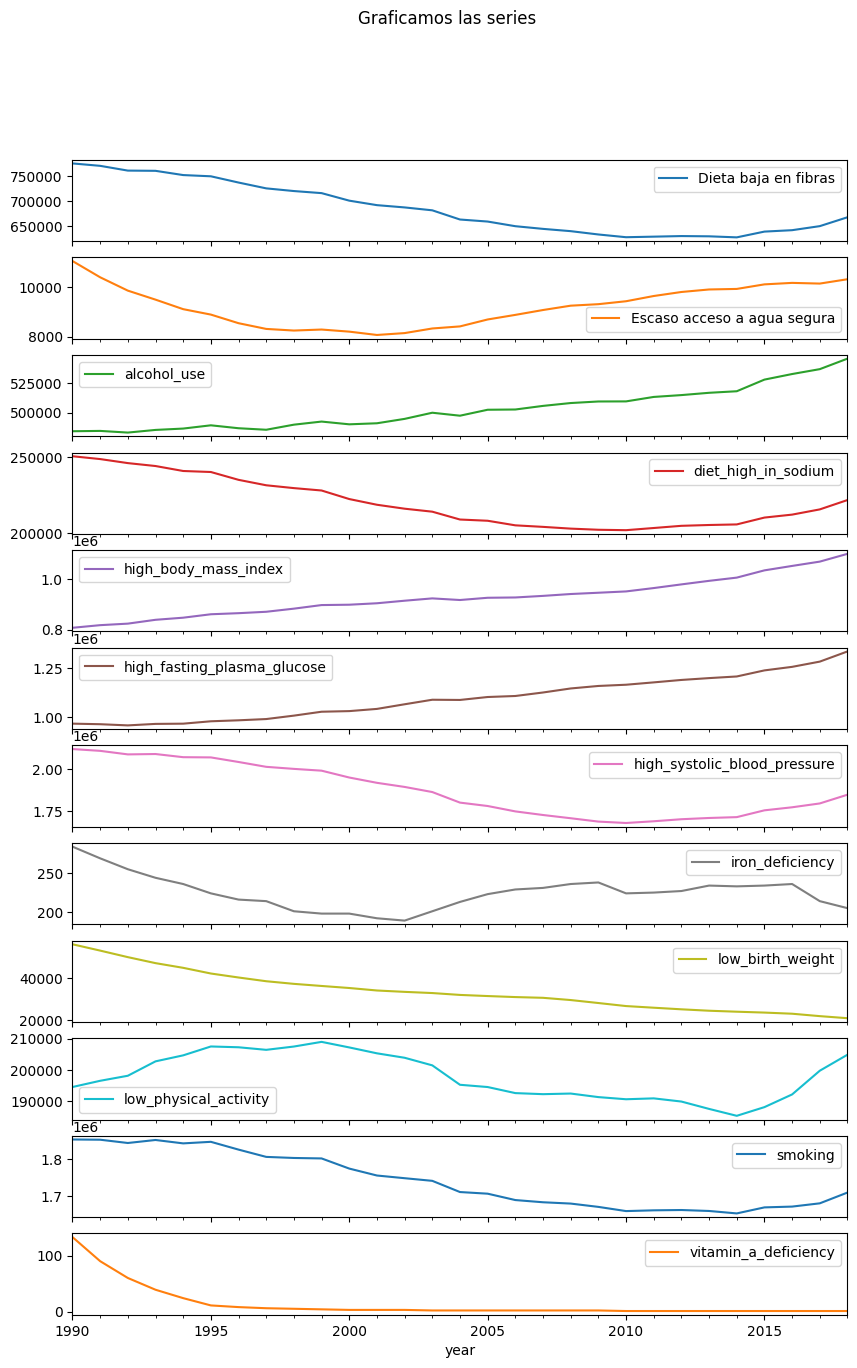

In [309]:
fig, ax = plt.subplots(figsize=(10, 15))
data.iloc[:, :12].plot(
    ax       = ax, 
    legend   = True,
    subplots = True, 
    sharex   = True,
    title    = 'Graficamos las series',
);

Empezamos armando un modelo ARIMA, eligiendo un solo factor de riesgo, como metodologia tradicional para compararlo con un modelo backstesting por xgb y random forest tomando variables individualmente y luego con todas.
Dividimos en train y test, primero tomamos solo una serie (uso de alcohol) y luego lo haremos por cross validation para los modelos multiseries.

In [310]:
fin_train = '2009-12-31'

In [311]:
data_train = data.loc[data.index <= fin_train].copy()
data_test   = data.loc[data.index >= fin_train].copy()

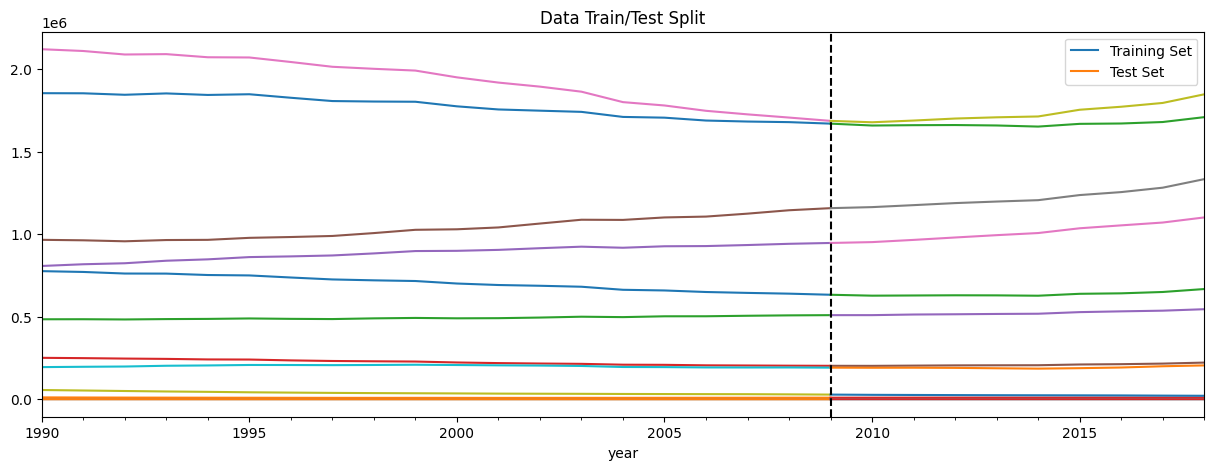

In [312]:
fig, ax = plt.subplots(figsize=(15, 5))
data_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
data_test.plot(ax=ax, label='Test Set')
ax.axvline('2009-12-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [313]:
train_oh = data["alcohol_use"].loc[data["alcohol_use"].index <= fin_train]
test_oh = data["alcohol_use"].loc[data["alcohol_use"].index > fin_train]

In [314]:
model = ARIMA(train_oh, order=(1,1,12))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            alcohol_use   No. Observations:                   20
Model:                ARIMA(1, 1, 12)   Log Likelihood                -166.918
Date:                Tue, 23 May 2023   AIC                            361.837
Time:                        20:45:59   BIC                            375.059
Sample:                    12-31-1990   HQIC                           364.075
                         - 12-31-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8938      0.351      2.547      0.011       0.206       1.582
ma.L1         -0.8936      0.372     -2.400      0.016      -1.623      -0.164
ma.L2         -0.0038      0.175     -0.022      0.9

In [315]:
predictions_arima = model_fit.forecast(len(test_oh))
mae_arima = mean_absolute_error(test_oh.values, predictions_arima)
mae_arima.round(3)

9575.141

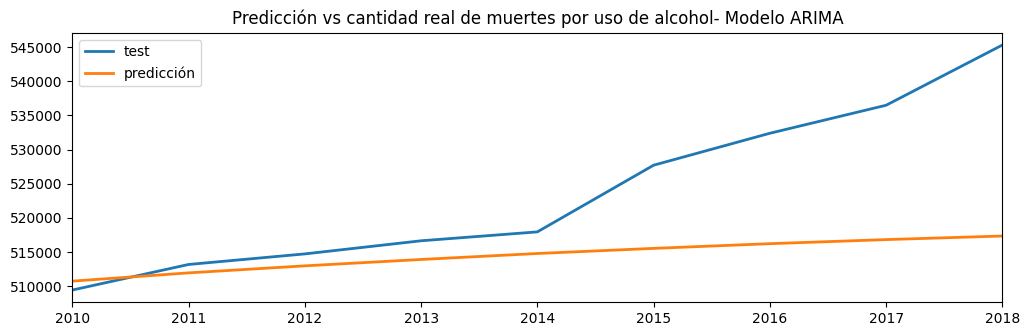

In [316]:
#Grafico predicciones ARIMA: pareciera haber bastante error en las predicciones al final de la serie
fig, ax = plt.subplots(figsize=(12, 3.5))
data.loc[predictions_arima.index, 'alcohol_use'].plot(ax=ax, linewidth=2, label='test')
predictions_arima.plot(linewidth=2, label='predicción', ax=ax)
ax.set_title('Predicción vs cantidad real de muertes por uso de alcohol- Modelo ARIMA')
ax.legend();

Se puede observar que las predicciones tiene bastante error, en especial los ultimos 4 años de esta serie

In [317]:
# Predicciones con random forest para la variable uso de alcohol
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor     = RandomForestRegressor(random_state=123),
                lags          = 3,
                transformer_y = StandardScaler(),
             )

forecaster.fit(y=train_oh)
metrica_rf, predicciones_rf = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = data["alcohol_use"],
                            initial_train_size = len(train_oh),
                            fixed_train_size   = False,
                            steps      = 2,
                            metric     = 'mean_absolute_error',
                            refit      = True,
                            verbose    = True
                        )

Information of backtesting process
----------------------------------
Number of observations used for initial training: 20
Number of observations used for backtesting: 9
    Number of folds: 5
    Number of steps per fold: 2
    Last fold only includes 1 observations.

Data partition in fold: 0
    Training:   1990-12-31 00:00:00 -- 2009-12-31 00:00:00  (n=20)
    Validation: 2010-12-31 00:00:00 -- 2011-12-31 00:00:00  (n=2)
Data partition in fold: 1
    Training:   1990-12-31 00:00:00 -- 2011-12-31 00:00:00  (n=22)
    Validation: 2012-12-31 00:00:00 -- 2013-12-31 00:00:00  (n=2)
Data partition in fold: 2
    Training:   1990-12-31 00:00:00 -- 2013-12-31 00:00:00  (n=24)
    Validation: 2014-12-31 00:00:00 -- 2015-12-31 00:00:00  (n=2)
Data partition in fold: 3
    Training:   1990-12-31 00:00:00 -- 2015-12-31 00:00:00  (n=26)
    Validation: 2016-12-31 00:00:00 -- 2017-12-31 00:00:00  (n=2)
Data partition in fold: 4
    Training:   1990-12-31 00:00:00 -- 2017-12-31 00:00:00  (n=28)
 

In [318]:
metrica_rf.round(3)

6896.111

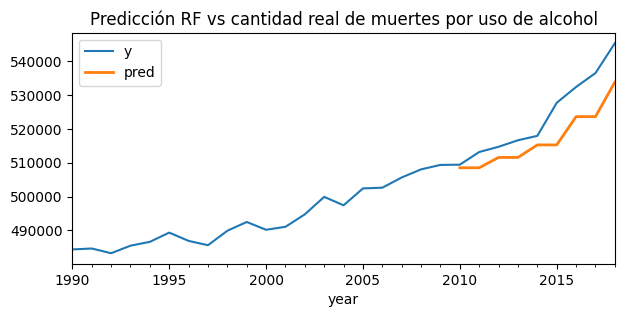

In [319]:
fig, ax = plt.subplots(figsize=(7, 3))
data["alcohol_use"].plot(ax=ax, label='y')
predicciones_rf.plot(linewidth=2, label='predicción', ax=ax)
ax.set_title('Predicción RF vs cantidad real de muertes por uso de alcohol')
ax.legend();

El error parece haber mejorado con backstesting, veamos si se puede mejorar aun mas con cross validation en un modelo con todas las series evaluadas en forma independiente (uniseries con random forest) y en multiseries con xgb y random forest

In [320]:
tss = TimeSeriesSplit(n_splits=3, test_size=3, gap=0)
data = data.sort_index()

In [321]:
# lags_grid = [1, 3, 8]
#         param_grid = {'n_estimators': [5, 10, 50],
#               'max_depth': [3, 5, 10]} 

============FOLD====================


100%|██████████| 12/12 [00:29<00:00,  2.49s/it]


============FOLD====================


100%|██████████| 12/12 [00:42<00:00,  3.54s/it]


============FOLD====================


100%|██████████| 12/12 [00:36<00:00,  3.01s/it]


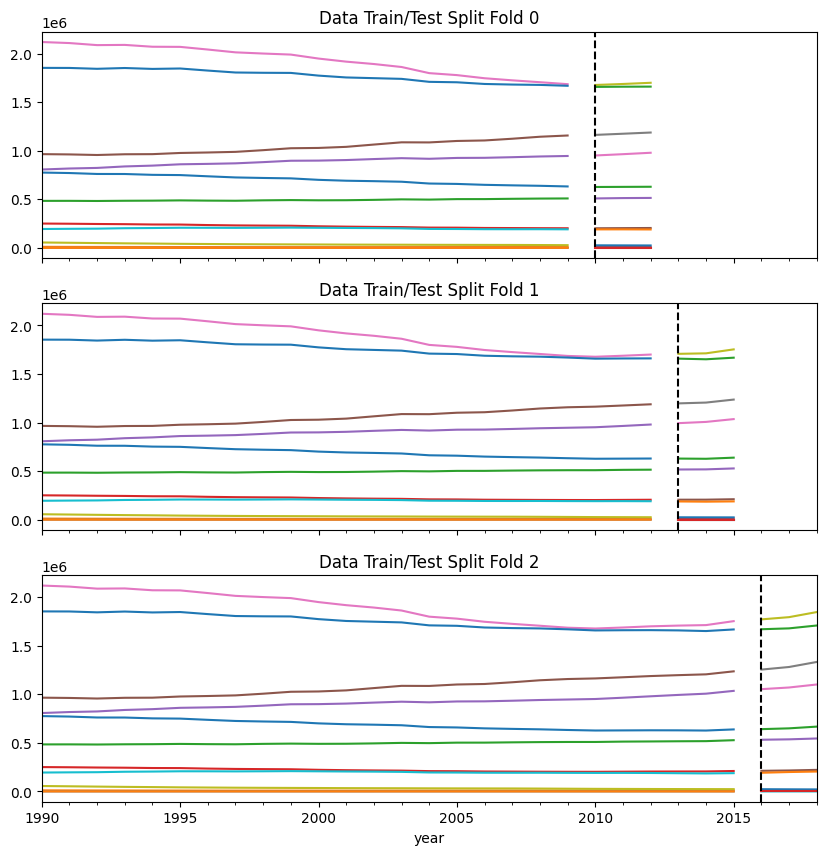

In [322]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

fold = 0

forecaster_xgb = ForecasterAutoreg(
                 regressor     = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=50),
                 lags          = 3,
                 transformer_y = StandardScaler()
             )

uni_series_mae_xg = []
uni_predictions_xg = []

series_mae_rf = []
predicciones_uni_rf = []

multi_series_mae_rf = []
multi_predictions_rf = []

for train_idx, val_idx in tss.split(data):
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]

    train.plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    
    test.plot(ax=axs[fold],
                         label='Test Set')
    
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    axs[fold].get_legend().remove()

    items = []
    mae_values_xgb = {}
    predictions_xgb = {}

    mae_values_rf = {}
    predictions_rf = {}

    print("============FOLD====================")
    for i, item in enumerate(tqdm(data.columns)):
#
        metric, preds = backtesting_forecaster(
                        forecaster         = forecaster_xgb,
                        y                  = train[item],        
                        initial_train_size = int(len(train)*0.5),
                        steps              = 2,
                        metric             = 'mean_absolute_error',
                        refit              = True,
                        fixed_train_size   = False,
                        verbose            = False
                    )
        
        items.append(item)
        mae_values_xgb[item] = metric
        predictions_xgb[item] = preds
        
        forecaster_rf = ForecasterAutoreg(
                    regressor     = RandomForestRegressor(random_state=123),
                    lags          = 3,
                    transformer_y = StandardScaler(),
                 )
        
        forecaster_rf.fit(y=train[item])
#
        metrica, predicciones = backtesting_forecaster(
                                forecaster = forecaster_rf,
                                y          = train[item],
                                initial_train_size = int(len(train)*0.5),
                                fixed_train_size   = False,
                                steps    = 2,
                                metric   = 'mean_absolute_error',
                                refit    = True,
                                verbose    = False
                            )
        
        mae_values_rf[item] = metrica
        predictions_rf[item] = predicciones

    forecaster_ms = ForecasterAutoregMultiSeries(
                regressor          = RandomForestRegressor(random_state=123),
                lags               = 3,
                transformer_series = StandardScaler(),
            )

    # Backtesting forecaster para todos los items
    multi_series_mae, predictions_ms = backtesting_forecaster_multiseries(
                                    forecaster         = forecaster_ms,
                                    series             = train,
                                    levels             = list(data.columns),
                                    steps              = 3,
                                    metric             = 'mean_absolute_error',
                                    initial_train_size = int(len(train)*0.5),
                                    refit              = True,
                                    fixed_train_size   = False,
                                    verbose            = False
                                )
    
    multi_series_mae_rf.append(multi_series_mae)    
    multi_predictions_rf.append(predictions_ms)
        
    series_mae_rf.append(pd.Series(
                     data  = mae_values_rf,
                     index = items,
                     name  = 'uni_series_mae_rf'
                 ))
    predicciones_uni_rf.append(pd.Series(
                     data  = predictions_rf,
                     index = items,
                     name  = 'uni_predictions_rf'
                 ))
#
    uni_series_mae_xg.append(pd.Series(
                     data  = mae_values_xgb,
                     index = items,
                     name  = 'uni_series_mae_xg'
                 ))
    uni_predictions_xg.append(pd.Series(
                     data  = predictions_xgb,
                     index = items,
                     name  = 'uni_predictions_xg'
                 ))


    fold += 1

plt.show()

In [323]:
#Errores en promedio con random forest uniseries
for c in data.columns:

    sum = 0

    for s in series_mae_rf:
        sum += s[c]

    print("RF: MAE promedio de " + c +": " + str(sum/len(series_mae_rf)))

RF: MAE promedio de Dieta baja en fibras: 13135.16844444443
RF: MAE promedio de Escaso acceso a agua segura: 357.7095085470085
RF: MAE promedio de alcohol_use: 4601.521222222219
RF: MAE promedio de diet_high_in_sodium: 4188.171700854702
RF: MAE promedio de high_body_mass_index: 13632.823311965825
RF: MAE promedio de high_fasting_plasma_glucose: 26206.003222222218
RF: MAE promedio de high_systolic_blood_pressure: 49995.23076923081
RF: MAE promedio de iron_deficiency: 13.142213675213677
RF: MAE promedio de low_birth_weight: 1579.9140512820538
RF: MAE promedio de low_physical_activity: 4522.783944444441
RF: MAE promedio de smoking: 20706.212940170957
RF: MAE promedio de vitamin_a_deficiency: 0.4447759632343041


In [324]:
multi_series_mae_rf_df = pd.concat(multi_series_mae_rf)

In [325]:
#Errores en promedio con random forest multiseries
for c in data.columns:
    print("multi RF: MAE promedio de " + c +": "  + str(np.mean((multi_series_mae_rf_df[multi_series_mae_rf_df.levels == c].mean_absolute_error))))


multi RF: MAE promedio de Dieta baja en fibras: 27246.31239026391
multi RF: MAE promedio de Escaso acceso a agua segura: 356.21301747181934
multi RF: MAE promedio de alcohol_use: 5931.368171020017
multi RF: MAE promedio de diet_high_in_sodium: 8890.465427565005
multi RF: MAE promedio de high_body_mass_index: 16958.82435389079
multi RF: MAE promedio de high_fasting_plasma_glucose: 39610.858647982495
multi RF: MAE promedio de high_systolic_blood_pressure: 96767.39628032241
multi RF: MAE promedio de iron_deficiency: 11.759779954637693
multi RF: MAE promedio de low_birth_weight: 3455.8092391132427
multi RF: MAE promedio de low_physical_activity: 3581.2274890306785
multi RF: MAE promedio de smoking: 43639.00468277289
multi RF: MAE promedio de vitamin_a_deficiency: 1.8073168391174044


In [326]:
#Errores en promedio con xgb
for c in data.columns:

    sum = 0

    for s in uni_series_mae_xg:
        sum += s[c]

    print("XGB: MAE promedio de " + c +": " + str(sum/len(uni_series_mae_xg)))

XGB: MAE promedio de Dieta baja en fibras: 10080.001889062767
XGB: MAE promedio de Escaso acceso a agua segura: 424.6038992328318
XGB: MAE promedio de alcohol_use: 4167.977783775332
XGB: MAE promedio de diet_high_in_sodium: 3187.502654562913
XGB: MAE promedio de high_body_mass_index: 10670.856706605375
XGB: MAE promedio de high_fasting_plasma_glucose: 19923.778630931007
XGB: MAE promedio de high_systolic_blood_pressure: 39227.00144680813
XGB: MAE promedio de iron_deficiency: 13.06777831620632
XGB: MAE promedio de low_birth_weight: 1189.5381730126394
XGB: MAE promedio de low_physical_activity: 5691.25006718143
XGB: MAE promedio de smoking: 15768.398930186739
XGB: MAE promedio de vitamin_a_deficiency: 0.36971961929739033


Los errores mejoraron en random forest utilizando cross validation con time series split, especialmente en el modelo uniseries, sin embargo no mejoro con xgboost

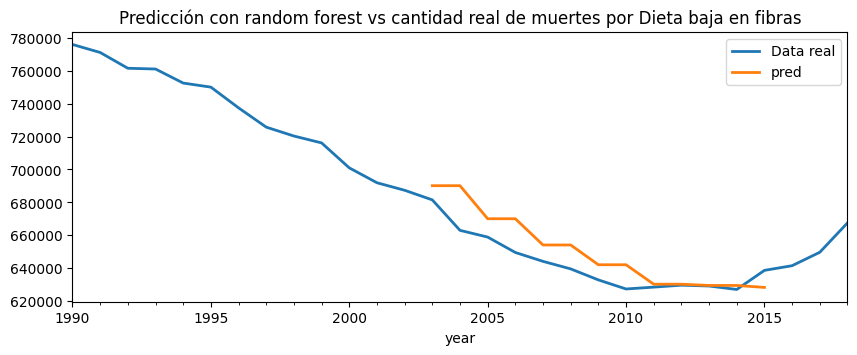

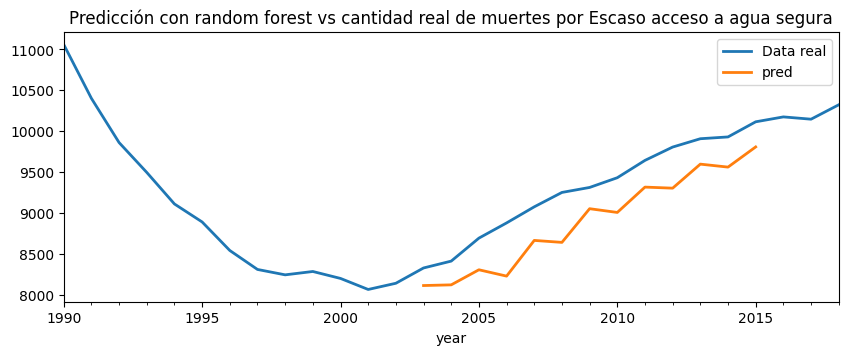

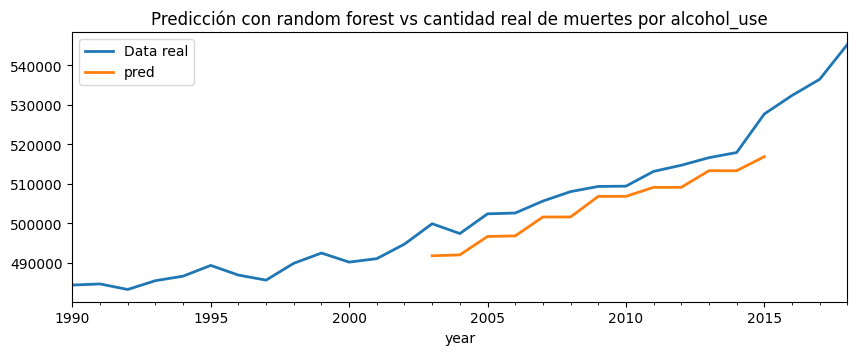

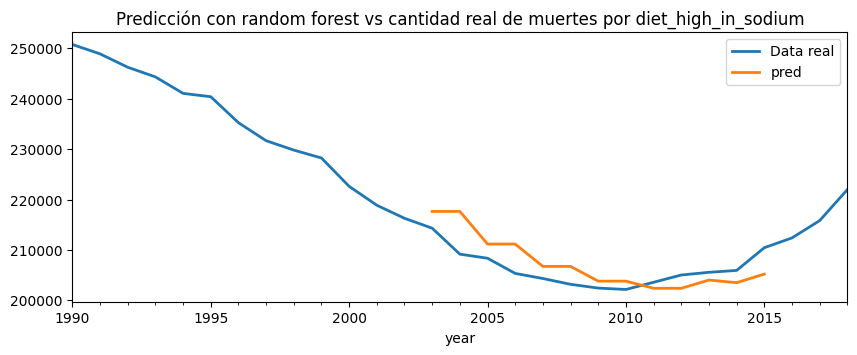

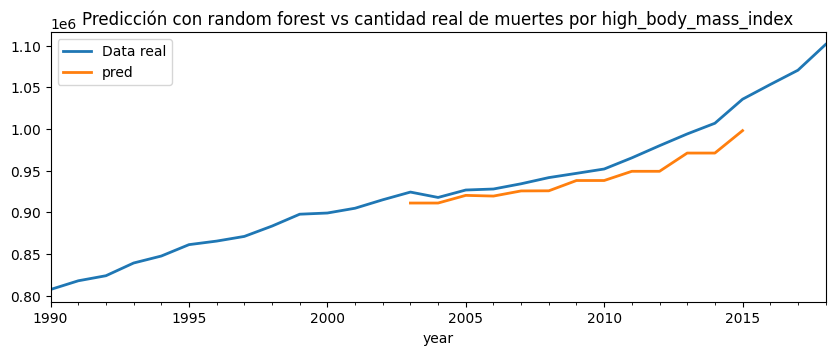

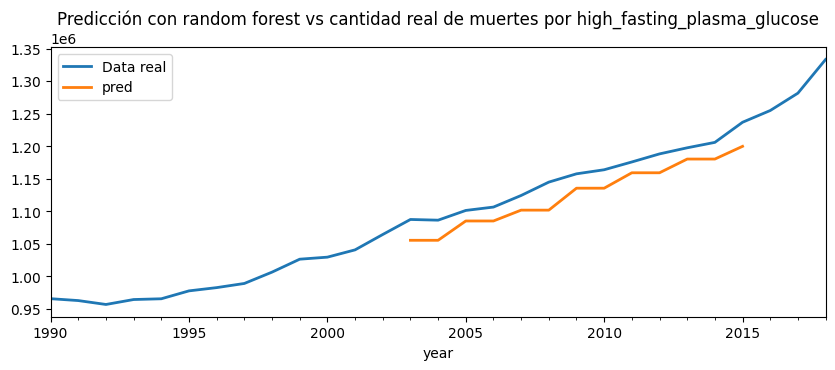

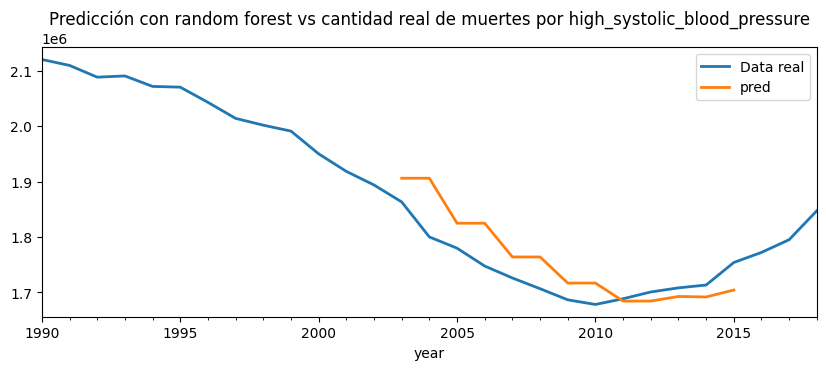

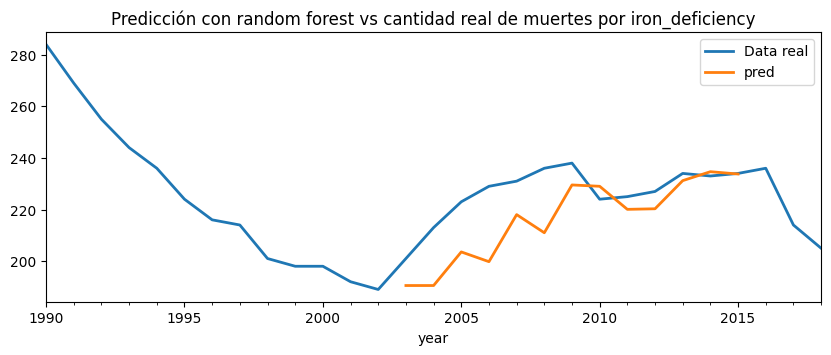

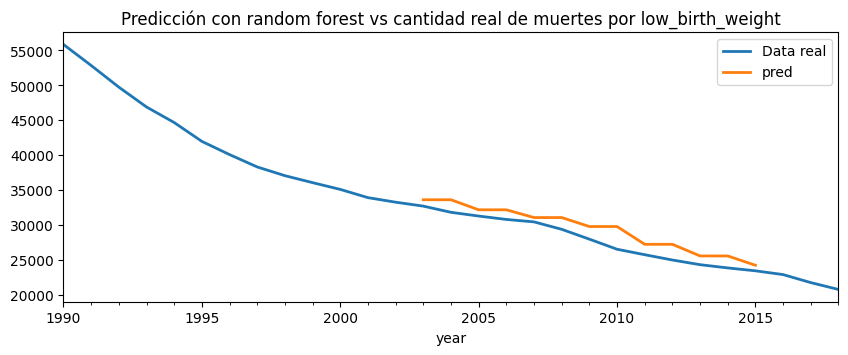

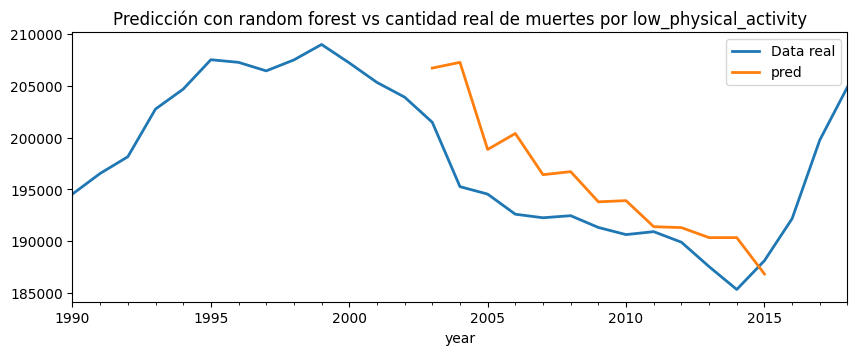

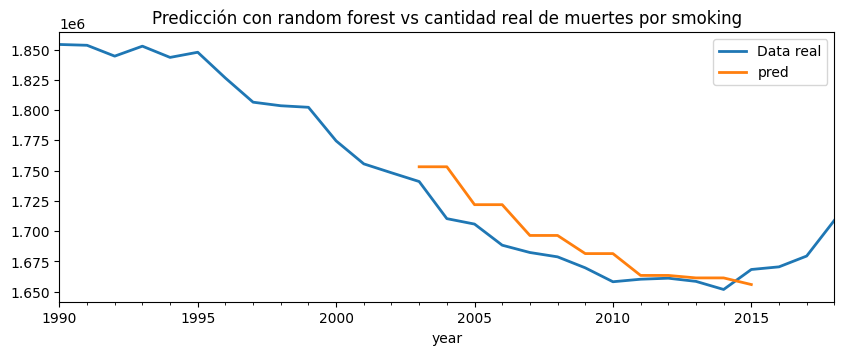

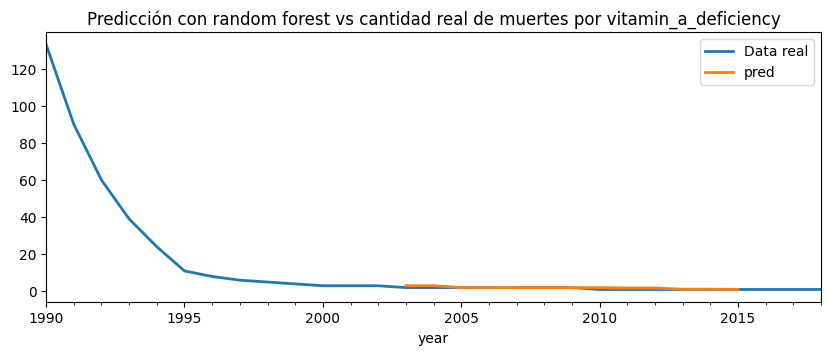

In [327]:
for c in data.columns:
    
    fig, ax = plt.subplots(figsize=(10, 3.5))
    data.loc[:, c].plot(ax=ax, linewidth=2, label='Data real')
    predictions_rf[c].plot(linewidth=2, label='Predicción', ax=ax)
    ax.set_title('Predicción con random forest vs cantidad real de muertes por ' + c)
    ax.legend()



Veamos una tabla comparativa de las metricas de los modelos, para tener una idea mas acabada de mejoria o no de las mismas.

In [328]:
uni_series_mae_xg

df_uni_series_mae_xg = pd.DataFrame(list(uni_series_mae_xg))
df_mean_uni_series_mae_xg= pd.DataFrame(df_uni_series_mae_xg.mean(axis=0))
df_mean_uni_series_mae_xg.columns = ['uni_series_mae_xg']
print(df_mean_uni_series_mae_xg.round(3))

                              uni_series_mae_xg
Dieta baja en fibras                  10080.002
Escaso acceso a agua segura             424.604
alcohol_use                            4167.978
diet_high_in_sodium                    3187.503
high_body_mass_index                  10670.857
high_fasting_plasma_glucose           19923.779
high_systolic_blood_pressure          39227.001
iron_deficiency                          13.068
low_birth_weight                       1189.538
low_physical_activity                  5691.250
smoking                               15768.399
vitamin_a_deficiency                      0.370


In [329]:
#Convierto el array de tuplas en un data frame, saco el promedio y le cambio el nombre a la columna

df_series_mae_rf = pd.DataFrame(list(series_mae_rf))
df_mean_series_mae_rf= pd.DataFrame(df_series_mae_rf.mean(axis=0))
df_mean_series_mae_rf.columns = ['uni_series_mae']
print(df_mean_series_mae_rf.round(3))

                              uni_series_mae
Dieta baja en fibras               13135.168
Escaso acceso a agua segura          357.710
alcohol_use                         4601.521
diet_high_in_sodium                 4188.172
high_body_mass_index               13632.823
high_fasting_plasma_glucose        26206.003
high_systolic_blood_pressure       49995.231
iron_deficiency                       13.142
low_birth_weight                    1579.914
low_physical_activity               4522.784
smoking                            20706.213
vitamin_a_deficiency                   0.445


In [330]:
multi_series_mae = multi_series_mae.set_index('levels')

In [331]:
#Tabla comparativa de errores
multi_series_mae.columns = ['multi_series_mae']
results = pd.concat((df_mean_series_mae_rf, multi_series_mae, df_mean_uni_series_mae_xg), axis = 1)
results['improvement (URF/MRF)'] = results.eval('uni_series_mae - multi_series_mae')
results['improvement (URF/MRF) [%]'] = 100 * results.eval('(uni_series_mae - multi_series_mae) / uni_series_mae')
results['improvement (URF/XGB)'] = results.eval('uni_series_mae - uni_series_mae_xg')
results['improvement (URF/XGB) [%]'] = 100 * results.eval('(uni_series_mae - uni_series_mae_xg) / uni_series_mae')
results = results.round(2)
results

,uni_series_mae,multi_series_mae,uni_series_mae_xg,improvement (URF/MRF),improvement (URF/MRF) [%],improvement (URF/XGB),improvement (URF/XGB) [%]
Dieta baja en fibras,13135.17,21223.89,10080.00,-8088.72,-61.58,3055.17,23.26
Escaso acceso a agua segura,357.71,266.64,424.60,91.07,25.46,-66.89,-18.70
alcohol_use,4601.52,6756.75,4167.98,-2155.22,-46.84,433.54,9.42
diet_high_in_sodium,4188.17,6272.61,3187.50,-2084.44,-49.77,1000.67,23.89
high_body_mass_index,13632.82,19802.25,10670.86,-6169.43,-45.25,2961.97,21.73
high_fasting_plasma_glucose,26206.00,39117.45,19923.78,-12911.45,-49.27,6282.22,23.97
high_systolic_blood_pressure,49995.23,76861.17,39227.00,-26865.94,-53.74,10768.23,21.54
iron_deficiency,13.14,8.24,13.07,4.91,37.33,0.07,0.57
low_birth_weight,1579.91,2167.93,1189.54,-588.01,-37.22,390.38,24.71
low_physical_activity,4522.78,3301.86,5691.25,1220.92,26.99,-1168.47,-25.84


Los unicos factores de riesgo que mejoraron sus metricas con el modelo multiserie son el escaso acceso a agua segura, la deficiencia de hierro y la baja actividad fisica, el resto no mejoro significativamente o empeoro. Por lo que se selecciono el modelo uniseries por random forest para realizar predicciones a 6 años

In [332]:
data.index.max()

Timestamp('2018-12-31 00:00:00', freq='A-DEC')

In [333]:
def create_features(df):
    """
    Creamos time series features.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [334]:
#Creo el rango de datos a futuro
original_data = data.copy()
future = pd.date_range('2019-12-31','2025-12-31', freq='1y')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
original_data['isFuture'] = False
df_and_future = pd.concat([original_data, future_df])
df_and_future = create_features(df_and_future)

In [335]:
original_data = create_features(original_data)

In [336]:
future_w_features = df_and_future.query('isFuture').copy()
future_w_features


,Dieta baja en fibras,Escaso acceso a agua segura,alcohol_use,diet_high_in_sodium,high_body_mass_index,high_fasting_plasma_glucose,high_systolic_blood_pressure,iron_deficiency,low_birth_weight,low_physical_activity,smoking,vitamin_a_deficiency,isFuture,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1,4,12,2019,365,31,1
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,3,4,12,2020,366,31,53
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,4,4,12,2021,365,31,52
2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,5,4,12,2022,365,31,52
2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,6,4,12,2023,365,31,52
2024-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1,4,12,2024,366,31,1
2025-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2,4,12,2025,365,31,1


In [337]:
reg = RandomForestRegressor(random_state=123)

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month','year']

X_all = original_data[FEATURES]

for i, item in enumerate(tqdm(data.columns)):
    
    y_all = original_data[item]

    reg.fit(X_all, y_all)
    
    future_w_features[item] = reg.predict(future_w_features[FEATURES])


100%|██████████| 12/12 [00:03<00:00,  3.46it/s]


Mostramos las predicciones obtenidas con el modelo elegido

In [338]:
future_w_features

,Dieta baja en fibras,Escaso acceso a agua segura,alcohol_use,diet_high_in_sodium,high_body_mass_index,high_fasting_plasma_glucose,high_systolic_blood_pressure,iron_deficiency,low_birth_weight,low_physical_activity,smoking,vitamin_a_deficiency,isFuture,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
2019-12-31,655187.42,10201.01,540128.41,218391.36,1075042.37,1299799.99,1813374.41,213.11,21589.38,200121.75,1690161.49,1.0,True,1,4,12,2019,365,31,1
2020-12-31,655850.02,10166.80,535616.11,217686.09,1068234.98,1282605.07,1806401.60,214.74,21969.46,200416.97,1692328.91,1.0,True,3,4,12,2020,366,31,53
2021-12-31,653970.30,10174.64,535956.30,217326.78,1068811.04,1281759.92,1799138.99,213.93,21875.96,200183.18,1691729.18,1.0,True,4,4,12,2021,365,31,52
2022-12-31,654472.96,10180.44,537026.44,217639.06,1074117.69,1286154.31,1806928.52,213.46,21804.46,200478.50,1692404.34,1.0,True,5,4,12,2022,365,31,52
2023-12-31,656673.97,10182.68,538056.67,217946.79,1075489.53,1291636.46,1810460.64,212.02,21690.61,201059.86,1694906.88,1.0,True,6,4,12,2023,365,31,52
2024-12-31,655702.87,10184.06,539324.10,218169.90,1073277.04,1297720.85,1812672.38,213.44,21839.94,200298.73,1690661.23,1.0,True,1,4,12,2024,366,31,1
2025-12-31,655138.59,10154.01,537178.74,218386.75,1068213.35,1286507.52,1811163.33,213.73,21795.10,200123.93,1689867.72,1.0,True,2,4,12,2025,365,31,1
